In [6]:
import pandas as pd

In [23]:
#df = pd.read_csv("nvidia_stock_2015_to_2024.csv", names = ['index','date','open','high','low','close','adjclose','volume'])
#print(df.head())
df = pd.read_csv("nvidia_stock_2015_to_2024.csv", parse_dates=["date"])

df.set_index("date", inplace = True)

df.describe()


,Unnamed: 0,open,high,low,close,adjclose,volume
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2.369000e+03
mean,1184.000000,14.188477,14.445906,13.919531,14.197878,14.169242,4.787526e+08
std,684.015716,18.683473,19.020099,18.315670,18.691694,18.697431,2.559874e+08
min,0.000000,0.481250,0.487500,0.473500,0.478500,0.459453,5.244800e+07
25%,592.000000,2.998250,3.045500,2.947500,3.032250,2.992067,3.188000e+08
50%,1184.000000,6.191500,6.262750,6.091500,6.178250,6.129900,4.277960e+08
75%,1776.000000,17.915001,18.243999,17.634001,17.983999,17.963766,5.745880e+08
max,2368.000000,114.650002,115.819000,110.901001,114.824997,114.815567,3.692928e+09


In [24]:
print(df.head())

            Unnamed: 0     open     high      low    close  adjclose  \
date                                                                   
2015-01-02           0  0.50325  0.50700  0.49525  0.50325  0.483218   
2015-01-05           1  0.50325  0.50475  0.49250  0.49475  0.475056   
2015-01-06           2  0.49550  0.49600  0.47925  0.47975  0.460654   
2015-01-07           3  0.48325  0.48750  0.47700  0.47850  0.459453   
2015-01-08           4  0.48400  0.49950  0.48375  0.49650  0.476737   

               volume  
date                   
2015-01-02  113680000  
2015-01-05  197952000  
2015-01-06  197764000  
2015-01-07  321808000  
2015-01-08  283780000  


In [25]:
df =df[["close"]]
df["target"] = df["close"].shift(-1)
df.dropna(inplace=True)
print(df.head())

              close   target
date                        
2015-01-02  0.50325  0.49475
2015-01-05  0.49475  0.47975
2015-01-06  0.47975  0.47850
2015-01-07  0.47850  0.49650
2015-01-08  0.49650  0.49850


In [27]:
from sklearn.model_selection import train_test_split

x = df[["close"]]
y = df["target"]

split_index = int(len(df) * 0.8)

x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.6f}")

RMSE: 1.513014


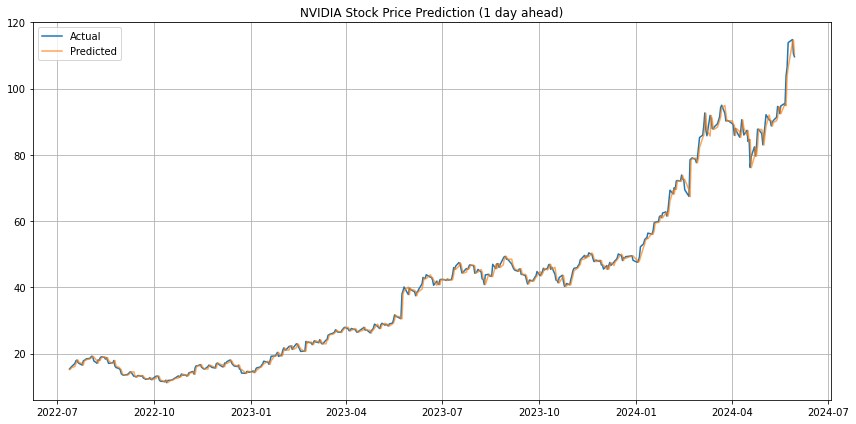

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title("NVIDIA Stock Price Prediction (1 day ahead)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()